<center><h1 style="background-color: #C6F3CD; border-radius: 10px; color: #FFFFFF; padding: 5px;">
Shapiro-Wilk Test

</h1><center/>

**Link to the article** : 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## One-sample KS test (known parameters)

In [2]:
# 1) One-sample KS test (known params)

np.random.seed(0)
# simulate data truly from N(100, 20)
data = np.random.normal(loc=100, scale=20, size=100)

# We *know* mu and sigma (hypothetical case)
mu_known = 100
sigma_known = 20

# perform one-sample KS test against N(100,20)
D, p_value = stats.kstest(data, 'norm', args=(mu_known, sigma_known))
print(f"KS statistic: {D:.4f}, p-value: {p_value:.4f}")

KS statistic: 0.0582, p-value: 0.8668


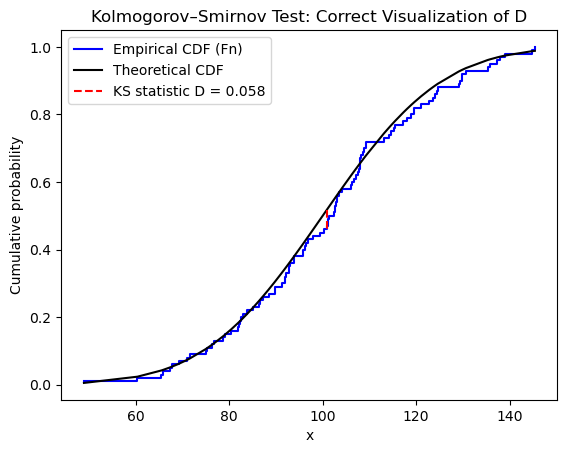

In [3]:
# Sort data
xs = np.sort(data)
n = len(xs)

# Empirical CDF
Fn = np.arange(1, n+1) / n

# Theoretical CDF
F_theo = stats.norm.cdf(xs, loc=mu_known, scale=sigma_known)

# Compute gaps at both sides of each step
gaps_before = np.abs((np.arange(0, n)/n) - F_theo)   # just before jump
gaps_after  = np.abs(Fn - F_theo)                    # just after jump
gaps = np.concatenate([gaps_before, gaps_after])

imax = np.argmax(gaps)
D_value = gaps[imax]
x_for_gap = xs[imax % n]   # map index back to x

# Plot
plt.step(xs, Fn, where='post', label="Empirical CDF (Fn)", color="blue")
plt.plot(xs, F_theo, label="Theoretical CDF", color="black")

# Mark the supremum gap
plt.vlines(x_for_gap,
           F_theo[imax % n],
           (np.arange(0, n+1)/n)[imax % (n+1)],
           colors="red", linestyles="--",
           label=f"KS statistic D = {D_value:.3f}")

plt.xlabel("x")
plt.ylabel("Cumulative probability")
plt.title("Kolmogorov–Smirnov Test: Correct Visualization of D")
plt.legend()
plt.show()

## One-sample KS test (unknown parameters)

In [5]:
np.random.seed(0)
data = np.random.normal(loc=100, scale=20, size=100)
mu_est = np.mean(data)
sigma_est = np.std(data, ddof=1)
D, p_value = stats.kstest(data, 'norm', args=(mu_est, sigma_est))
print(f"KS statistic: {D:.4f}, p-value: {p_value:.4f}")

KS statistic: 0.0643, p-value: 0.7778


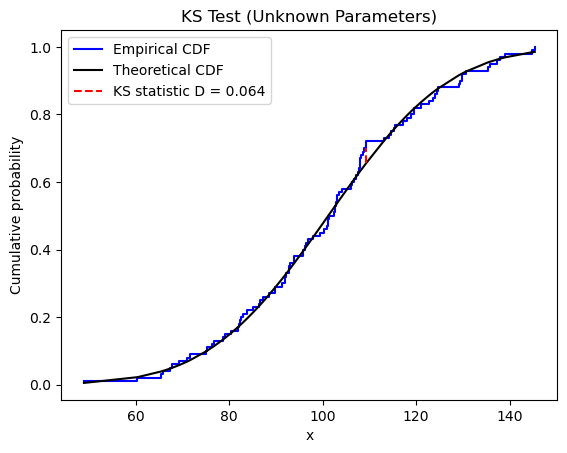

In [6]:
xs = np.sort(data)
n = len(xs)

Fn = np.arange(1, n+1) / n
F_theo = stats.norm.cdf(xs, loc=mu_est, scale=sigma_est)

gaps_before = np.abs((np.arange(0, n)/n) - F_theo)
gaps_after  = np.abs(Fn - F_theo)
gaps = np.concatenate([gaps_before, gaps_after])

imax = np.argmax(gaps)
D_value = gaps[imax]
x_for_gap = xs[imax % n]

plt.step(xs, Fn, where='post', label="Empirical CDF", color="blue")
plt.plot(xs, F_theo, label="Theoretical CDF", color="black")
plt.vlines(x_for_gap,
           F_theo[imax % n],
           (np.arange(0, n+1)/n)[imax % (n+1)],
           colors="red", linestyles="--",
           label=f"KS statistic D = {D_value:.3f}")
plt.xlabel("x")
plt.ylabel("Cumulative probability")
plt.title("KS Test (Unknown Parameters)")
plt.legend()
plt.show()

## Two-sample KS test

In [7]:
np.random.seed(2)
a = np.random.normal(loc=100, scale=20, size=150)   # sample A 
b = np.random.normal(loc=105, scale=20, size=120)   # sample B

In [8]:
res = stats.ks_2samp(a, b, alternative='two-sided', mode='auto')
D = res.statistic
p_value = res.pvalue
print(f"Two-sample KS: D = {D:.4f}, p-value = {p_value:.4f}")

Two-sample KS: D = 0.1717, p-value = 0.0349


In [9]:
# Prepare combined grid for plotting EDFs
xs = np.sort(np.concatenate([a, b]))
n_a = len(a)
n_b = len(b)

# Empirical CDF values at each xs for sample A and B
Fn_a = np.searchsorted(np.sort(a), xs, side='right') / n_a
Fn_b = np.searchsorted(np.sort(b), xs, side='right') / n_b

In [10]:
gaps = np.abs(Fn_a - Fn_b)
imax = np.argmax(gaps)
D_value = gaps[imax]
x_for_gap = xs[imax]

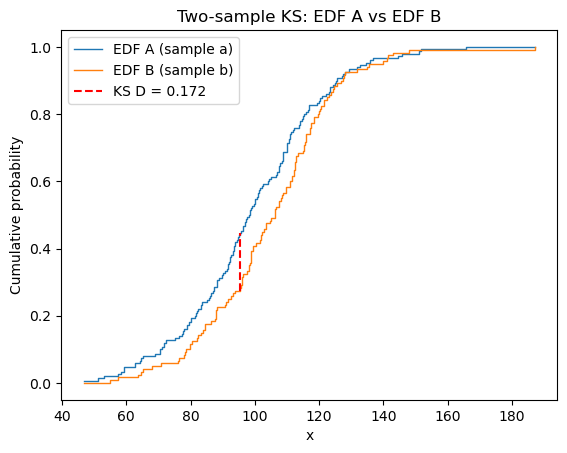

In [11]:
plt.step(xs, Fn_a, where='post', label='EDF A (sample a)', linewidth=1)
plt.step(xs, Fn_b, where='post', label='EDF B (sample b)', linewidth=1)

# Mark max gap
plt.vlines(x_for_gap,
           min(Fn_a[imax], Fn_b[imax]),
           max(Fn_a[imax], Fn_b[imax]),
           colors='red', linestyles='--', label=f"KS D = {D_value:.3f}")

plt.xlabel('x')
plt.ylabel('Cumulative probability')
plt.title('Two-sample KS: EDF A vs EDF B')
plt.legend()
plt.show()